In [62]:
# Importing the necessary packages
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
import pickle
import numpy as np
with open('embeddings.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"]
y = data["labels"]

In [5]:
embeddings = np.array(x)

In [8]:
y = np.array(y)

### LDA

In [60]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
accuracy_train = lda.score(X_train, y_train)
print("Training Accuracy:", accuracy_train)
accuracy_test = lda.score(X_test, y_test)
print("Testing Accuracy:", accuracy_test)

Training Accuracy: 0.7791119254609957
Testing Accuracy: 0.7411507874629658


### PCA + LDA

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca_emb = pca.fit_transform(embeddings)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(pca_emb, y, test_size=0.2, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

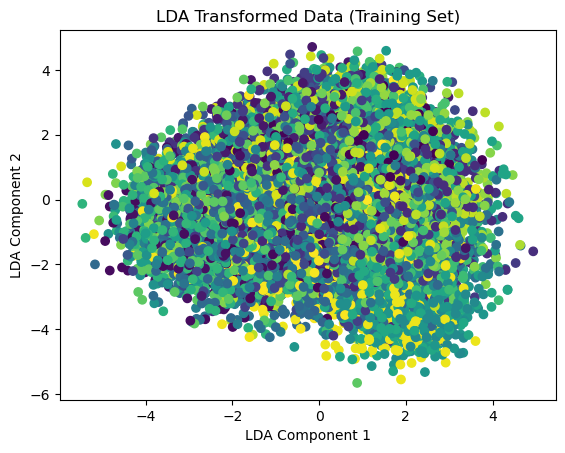

In [23]:
X_train_transformed = lda.transform(X_train)
plt.scatter(X_train_transformed[:, 0], X_train_transformed[:, 1], c=y_train)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Transformed Data (Training Set)')
plt.show()

Training Accuracy: 0.7355268800436631


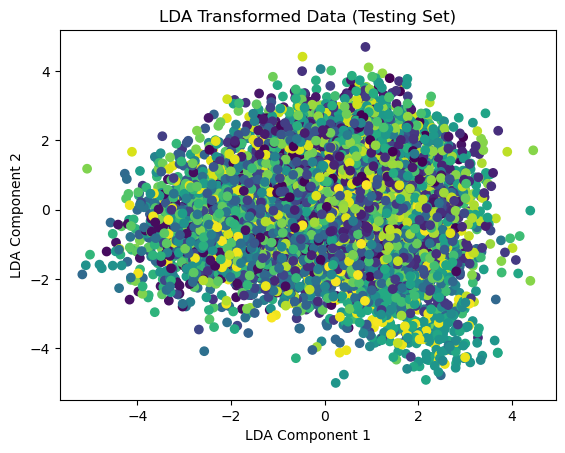

Testing Accuracy: 0.7307032590051458


In [24]:
accuracy_train = lda.score(X_train, y_train)
print("Training Accuracy:", accuracy_train)
X_test_transformed = lda.transform(X_test)
plt.scatter(X_test_transformed[:, 0], X_test_transformed[:, 1], c=y_test)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Transformed Data (Testing Set)')
plt.show()
accuracy_test = lda.score(X_test, y_test)
print("Testing Accuracy:", accuracy_test)

In [63]:
train_accuracy = []
test_accuracy = []
for i in tqdm(range(2,345)):
    pca = PCA(n_components=i)
    pca_emb = pca.fit_transform(embeddings)
    X_train, X_test, y_train, y_test = train_test_split(pca_emb, y, test_size=0.2, random_state=42)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    train_accuracy.append(lda.score(X_train, y_train))
    test_accuracy.append(lda.score(X_test, y_test))
    
    


100%|██████████| 343/343 [06:29<00:00,  1.14s/it]


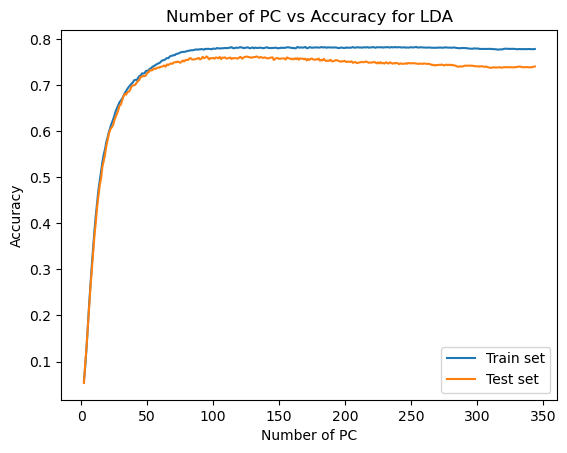

In [64]:
plt.plot(list(range(2,345)), train_accuracy, label = 'Train set')
plt.plot(list(range(2,345)), test_accuracy, label = 'Test set')
plt.title('Number of PC vs Accuracy for LDA')
plt.xlabel('Number of PC')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [66]:
print(max(test_accuracy))
print(test_accuracy[-1])

0.7629814439419929
0.7411507874629658


#### HDBSCAN

In [25]:
from sklearn.cluster import HDBSCAN

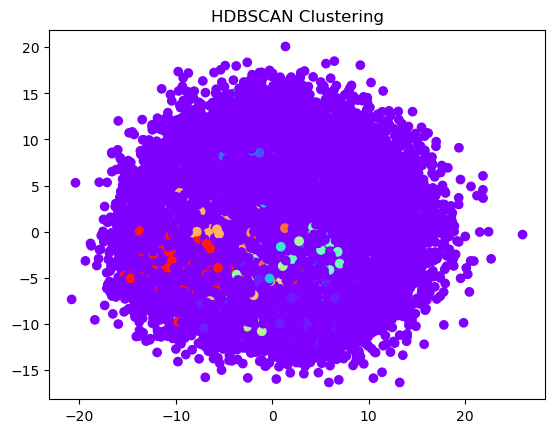

In [51]:
pca = PCA(n_components=19)
pca_emb = pca.fit_transform(embeddings)
hdb = HDBSCAN(min_cluster_size=8)
hdb.fit(pca_emb)
plt.scatter(pca_emb[:, 0], pca_emb[:, 1], c=hdb.labels_, cmap='rainbow')
plt.title("HDBSCAN Clustering")
plt.show()

In [53]:
len(np.unique(hdb.labels_))

29

In [54]:
from tqdm import tqdm
num_clusters = []
for i in tqdm(range(2, 200)):
    pca = PCA(n_components=2)
    pca_emb = pca.fit_transform(embeddings)
    hdb = HDBSCAN(min_cluster_size=8)
    hdb.fit(pca_emb)
    num_clusters.append(len(np.unique(hdb.labels_)))

100%|██████████| 198/198 [24:22<00:00,  7.39s/it]


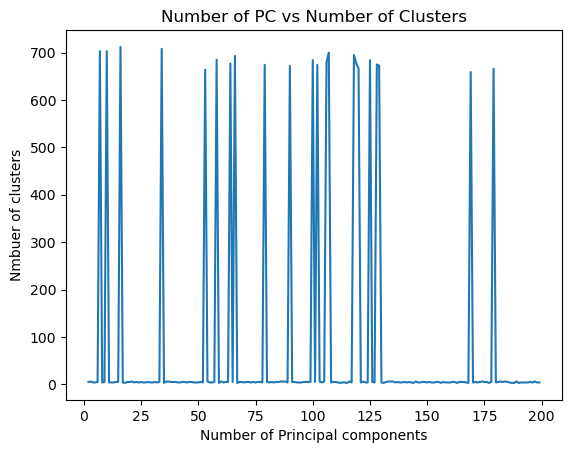

In [58]:
plt.plot(list(range(2,200)), num_clusters)
plt.title('Number of PC vs Number of Clusters')
plt.xlabel('Number of Principal components')
plt.ylabel('Nmbuer of clusters')
plt.show()

### Hierachical clustering

In [67]:
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage

In [73]:
n = embeddings.shape[0]
distance_matrix = np.zeros((n, n))

for i in tqdm(range(n)):
    fd_i = embeddings[i]
    for k in range(i):
        fd_k = embeddings[k]
        distance_matrix[i, k] = distance.jensenshannon(fd_i, fd_k)


distance_matrix = np.maximum(distance_matrix, distance_matrix.transpose())

distance_matrix

100%|██████████| 32064/32064 [4:53:56<00:00,  1.82it/s]  


array([[ 0., inf, inf, ..., inf, inf, inf],
       [inf,  0., inf, ..., inf, inf, inf],
       [inf, inf,  0., ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ...,  0., inf, inf],
       [inf, inf, inf, ..., inf,  0., inf],
       [inf, inf, inf, ..., inf, inf,  0.]])

In [71]:
cond_distance_matrix = distance.squareform(distance_matrix)
Z = linkage(cond_distance_matrix, method='ward')

(32064, 344)

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(Z, color_threshold=0.2, show_leaf_counts=True)
plt.show()

In [ ]:
def get_cond_matrix(data, pca_comp = 2):
    pca = PCA(n_components=pca_comp)
    pca_data = pca.fit_transform(data)
    n = pca_data.shape[0]
    dist_m = np.zeroes((n,n))
    for i in tqdm(range(n)):
        fd_i = pca_data[i]
        for k in range(i):
            fd_k = pca_data[k]
            dist_ffmatrix[i, k] = distance.jensenshannon(fd_i, fd_k)
    dis

